In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This dataset does not have column headings. So, let's assign column headings to this dataset.

In [3]:
df.columns=["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Applicant_Income","Coapplicant_Income","Loan_Amount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Observations:

The dataset contains 614 rows and 13 columns.

The column "Loan_Status" is the label which is categorical, so this is a classification problem.

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Exploratory Data Analysis (EDA)

In [7]:
df.shape

(614, 13)

In [8]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations:

There are 4 float, 1 integer and 8 object data type columns.

The column "Dependents" should be of integer data type but it is of object datatype. We will investigate this later.

In [10]:
#Check null values
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

We can see that there are some null values in some of the columns.

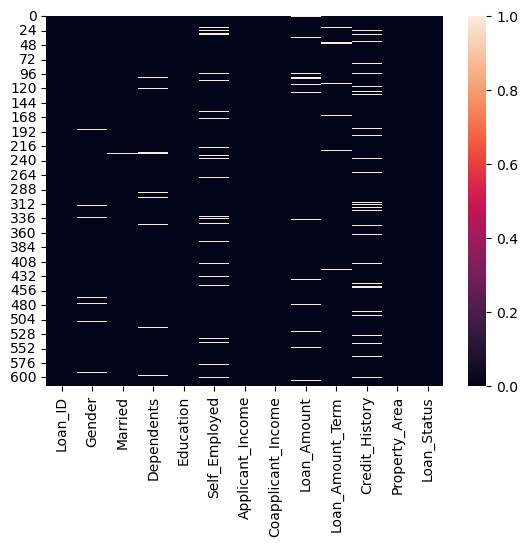

In [11]:
#Visulaize null values
sns.heatmap(df.isnull())
plt.show()

We can also visualize that there are some null values in the dataset.

In [12]:
#Check the counts of unique values of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: Applicant_Income, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: Coapplicant_Income, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
2

Observations:

Some columns have continuous data and some have categorical data.

The label "Loan_Status" is categorical and contains two categories. So, this is a binary classification problem.

The column "Loan_ID" contains unique id numbers. It does not contribute to the prediction of the label, so it has to be removed.

The column "Dependents" contains a value 3+ because of which the data type of the column is object. The value 3+ has to be replaced with an integer value so that the data type of the column can be changed to integer. This will be done later.

In [13]:
#Drop "Loan_ID" cloumn
df.drop("Loan_ID",axis=1,inplace=True)

Handling missing values

In [18]:
# Imputation of missing values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount'].fillna(df['Loan_Amount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [20]:
#Check if there are any duplicate rows
df.duplicated().sum()

0

We can see that there are no duplicate rows in our dataset.

In [21]:
#Check null values again
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

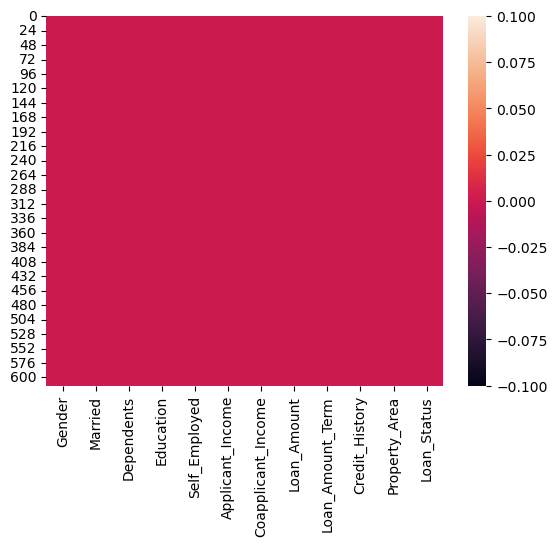

In [22]:
#Visualize null values again
sns.heatmap(df.isnull())
plt.show()

We can also clearly visualize that there are no null values in the dataset.

In [23]:
#Separate continuous and categorical columns
continuous_col=["Applicant_Income","Coapplicant_Income","Loan_Amount"]
categorical_col=[i for i in df.columns if i not in continuous_col]
print("Continuous columns: ",continuous_col)
print("Number of continuous columns",len(continuous_col))
print("\n")
print("Categorical columns: ",categorical_col)
print("Number of categorical columns",len(categorical_col))

Continuous columns:  ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']
Number of continuous columns 3


Categorical columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Number of categorical columns 9


In [24]:
#Statistical summary of numerical columns
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observations:

There are no missing values in the dataset.

The colummns "Applicant_Income", "Coapplicant_Income" and "Loan_Amount" appear to be right skewed as the mean is higher than the median in these columns.

The colummns "Applicant_Income", "Coapplicant_Income" and "Loan_Amount" appear to have outliers as max is much bigger than 75% in these columns.

# Data Visualization

Univariate Analysis

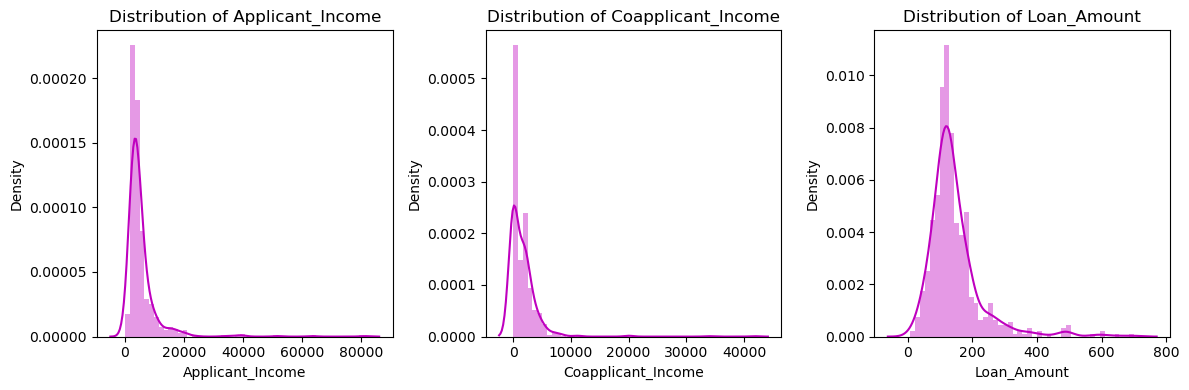

In [26]:
#Analyse the distribution of data for all the continuous data columns
plt.figure(figsize=(12,4),facecolor="white")
plotnumber=1
for col in continuous_col:
    ax=plt.subplot(1,3,plotnumber)
    sns.distplot(df[col],color="m")
    plt.title(f"Distribution of {col}")
    plotnumber+=1
plt.tight_layout()

We can observe that all the three columns "Applicant_Income", "Coapplicant_Income" and "Loan_Amount" are right skewed.

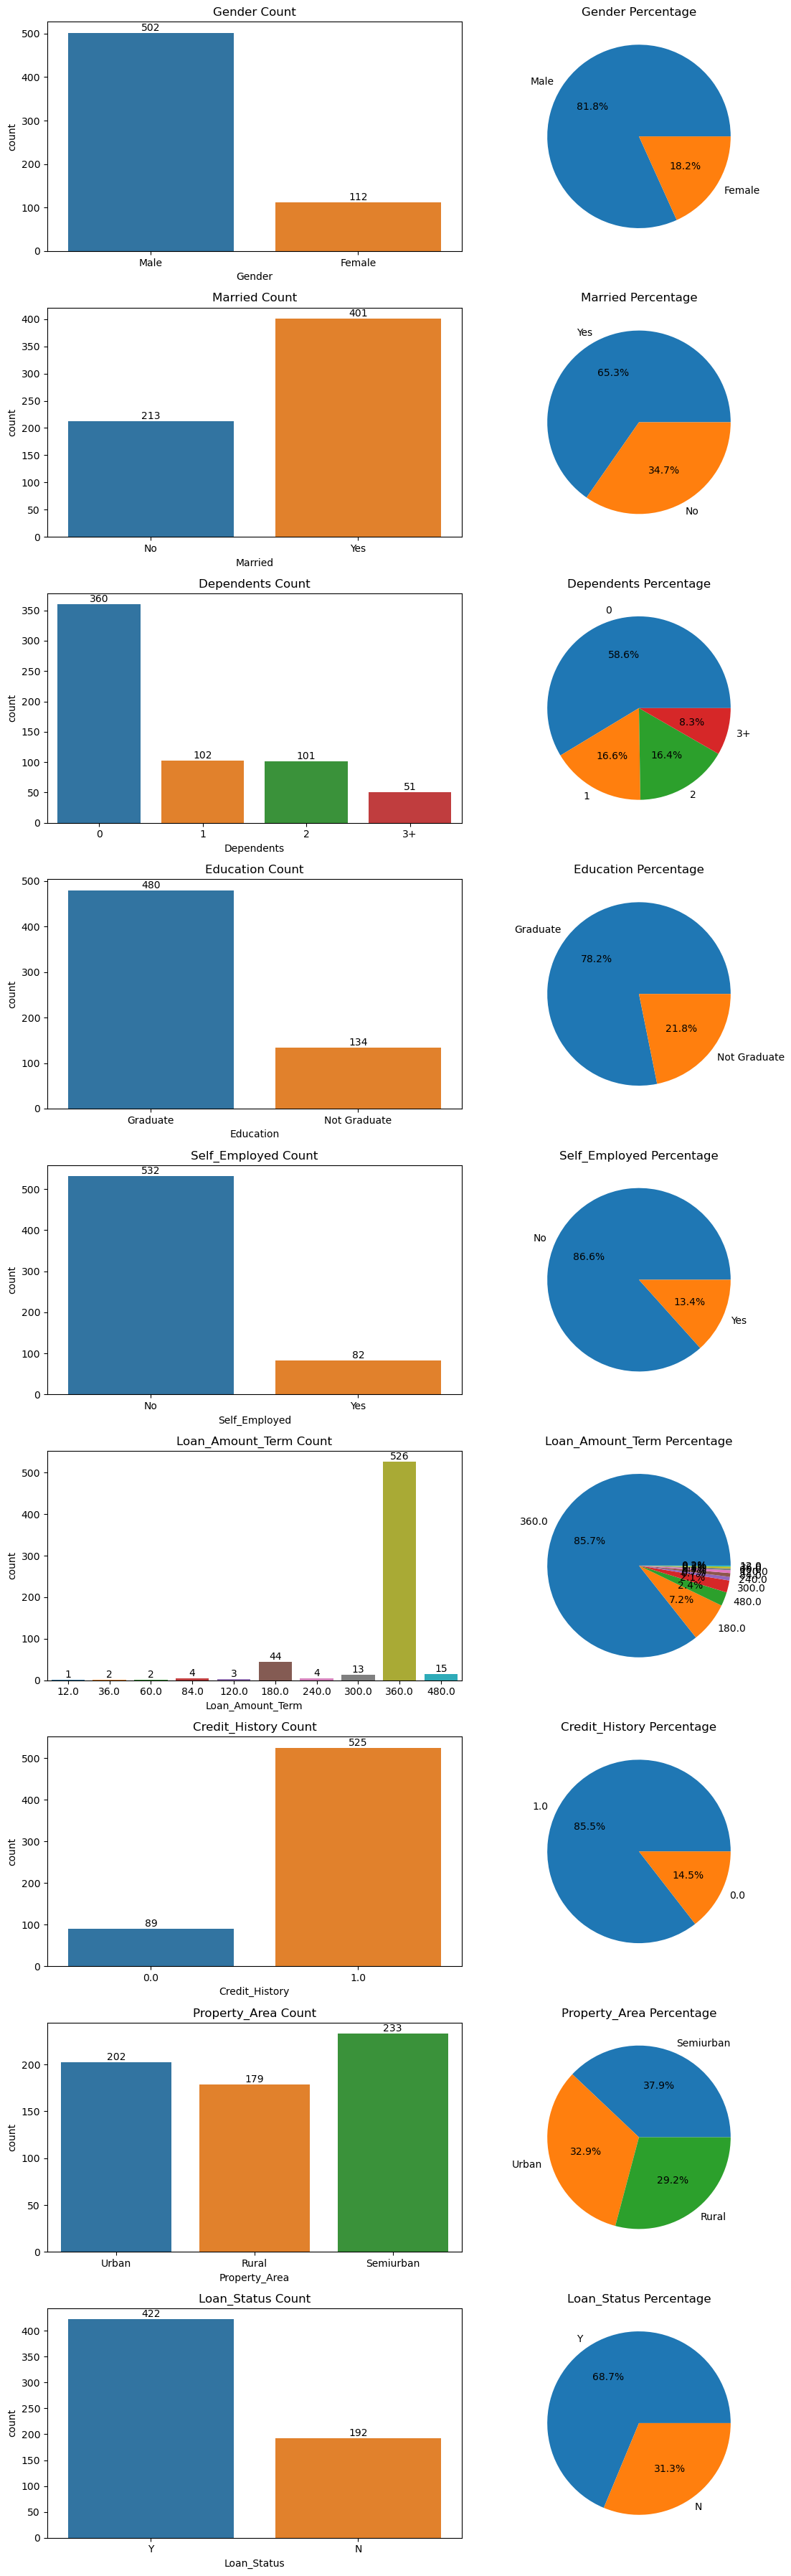

In [31]:
#Analyse the distribution of data for all the categorical data columns
plt.figure(figsize=(12,36),facecolor="white")
plotnumber=1
for col in categorical_col:
    plt.subplot(9,2,plotnumber)
    ax=sns.countplot(x=col,data=df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f"{col} Count")
    plt.subplot(9,2,plotnumber+1)
    df[col].value_counts().plot(kind='pie', autopct='%0.1f%%',label='')
    plt.gca().yaxis.set_visible(False)
    plt.title(f"{col} Percentage")
    plotnumber+=2
plt.tight_layout()

Observations:

It's evident that there were 502 males accounting for 81.8% of the total number of loan applicants.

Conversely, there were 112 females constituting 18.2% of the total number of loan applicants.

There were 401 married people constituting 65.3% of the total number of loan applicants.

There were 213 unmarried people constituting 34.7% of the total number of loan applicants.

People with no dependents were the largest number of applicants with 360 people constituting 58.6% of the total number of loan applicants.

There were 480 graduates constituting 78.2% of the total number of loan applicants.

There were 134 people who were not graduates constituting 21.8% of the total number of loan applicants.

There were 82 self-employed people constituting 13.4% of the total number of loan applicants.

There were 532 people who were not self-employed constituting 86.6% of the total number of loan applicants.

Largest number of people have opted for 360 as the loan amount term with 526 people opting for it constituting 85.7% of the total number of loan applicants.

525 people constituting 85.5% of the total number of loan applicants had a credit history of 1.

89 people constituting 14.5% of the total number of loan applicants had a credit history of 0.

Largest number of loan applicants had property in semi-urban areas with 233 people constituting 37.9% of the total number of loan applicants.

There were more number of loan approval than rejections.

422 people have got the loan approved constituting 68.7% of the total number of loan applicants.

192 people have got the loan rejected constituting 31.3% of the total number of loan applicants.

This makes it evident that the label "Loan_Status" is not balanced which will be balanced later.

Bivariate Analysis

Let's analyse the relationship between the label and the features

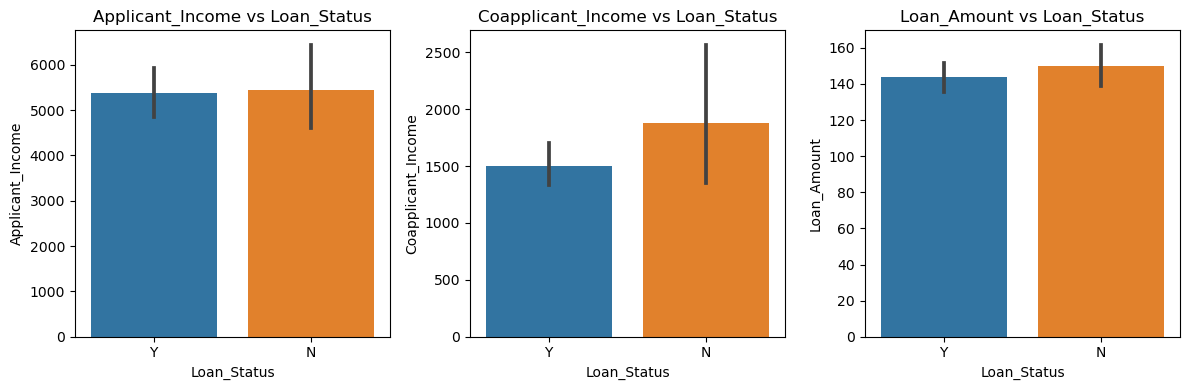

In [32]:
#Analyse the correlation between "Loan_Status" and various continuous features
plt.figure(figsize=(12,4),facecolor="white")
plotnumber=1
for col in continuous_col:
    ax=plt.subplot(1,3,plotnumber)
    sns.barplot(x='Loan_Status',y=col,data=df)
    plt.title(f"{col} vs Loan_Status")
    plotnumber+=1
plt.tight_layout()

Observations:

Loan status does not differ much with applicant income which means there is not much of correlation between the feature "Applicant_Income" and the label "Loan_Status".

Loans status tends to be approved when coapplicant income is low and rejected when coapplicant income is high which means the feature "Coapplicant_Income" is slightly correlated with the label "Loan_Status".

Loans status tends to be approved when loan amount is low and rejected when loan amount is high which means that the feature "Loan_Amount" is highly correlated with the label "Loan_Status".

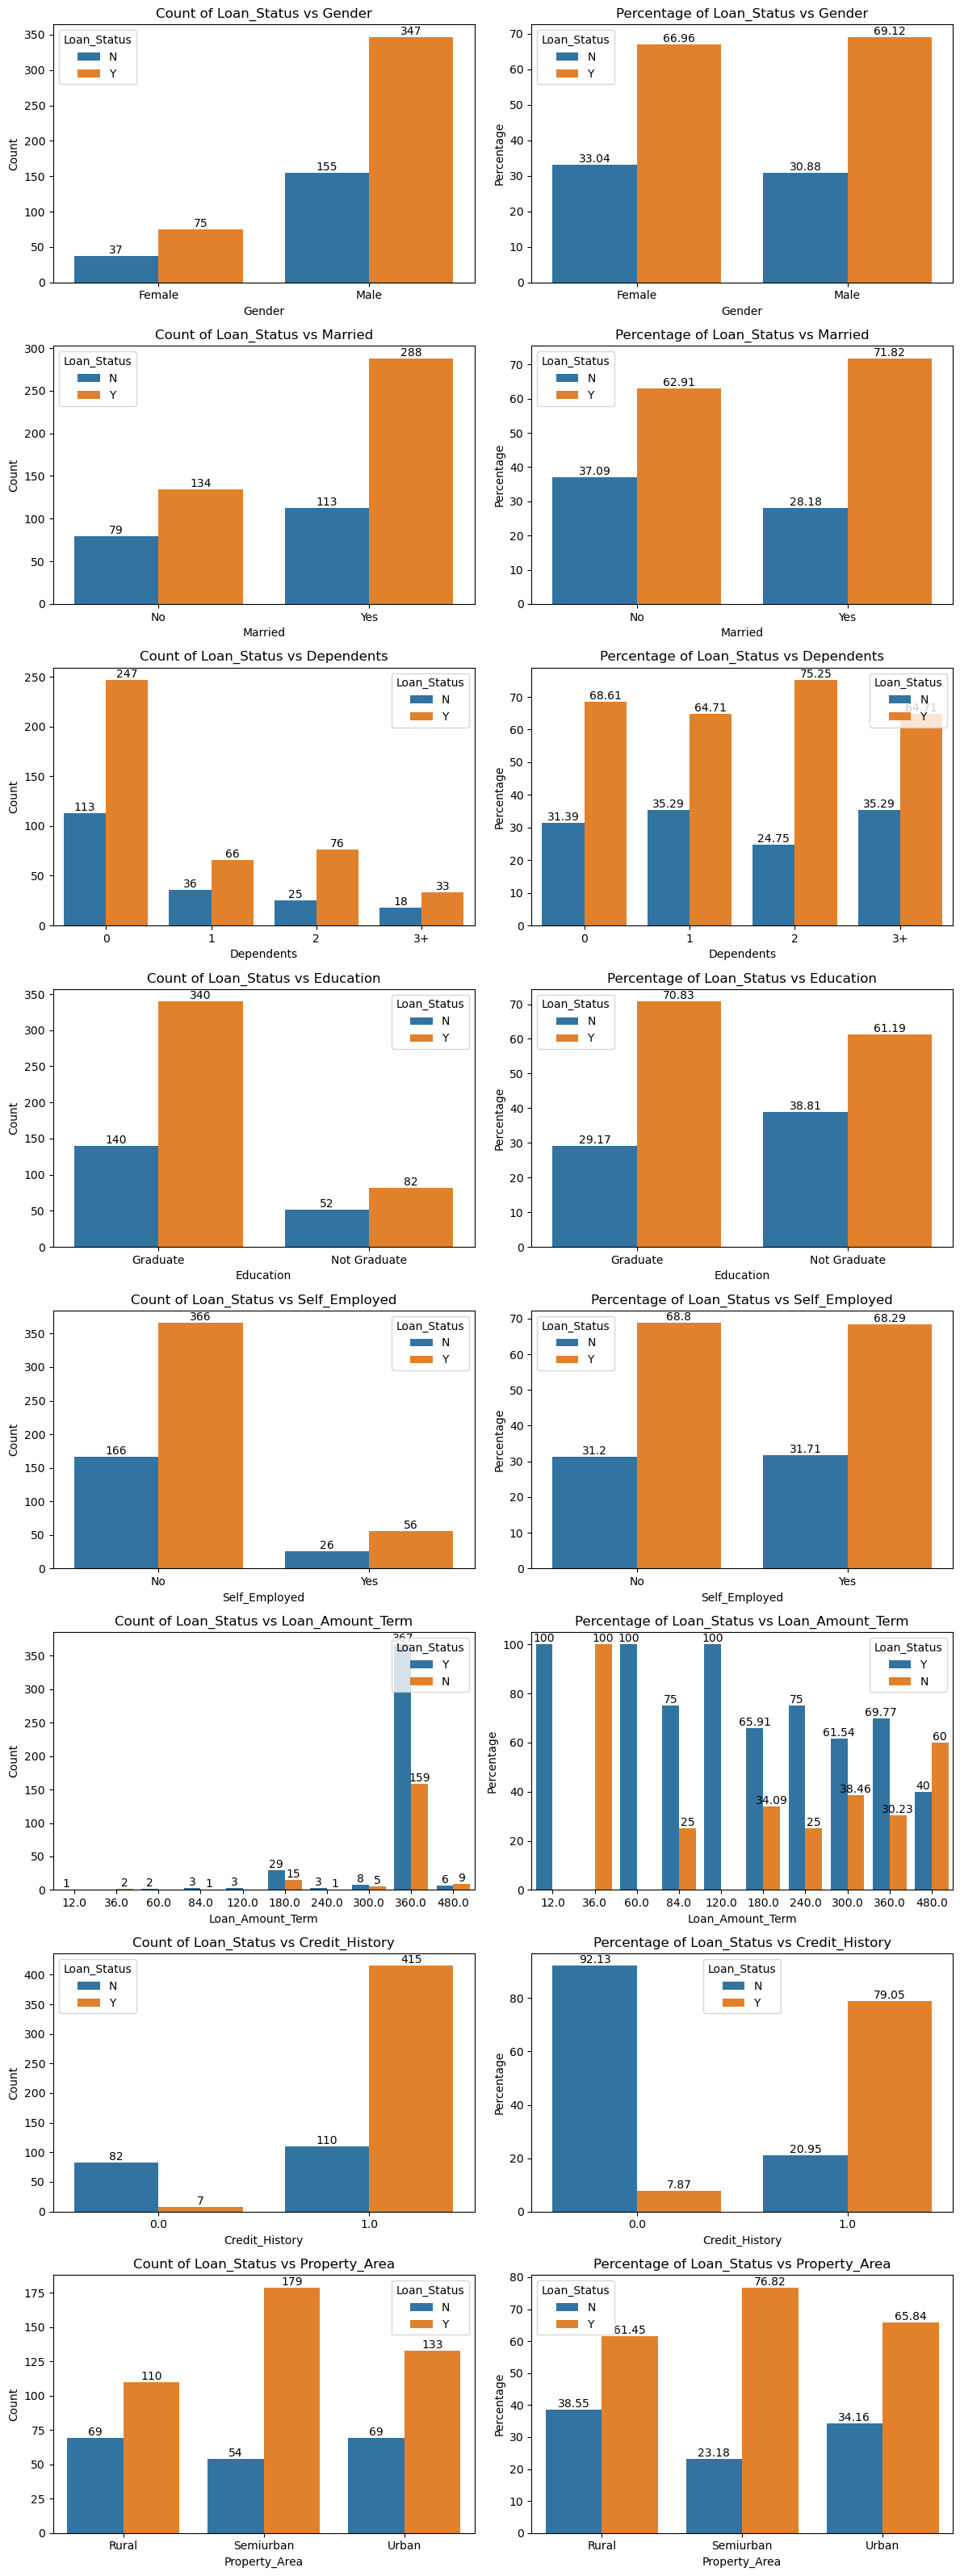

In [58]:
#Analyse the "Loan_Status" based on different categorical features
plt.figure(figsize=(12,32),facecolor="white")
plotnumber=1
for col in categorical_col[:-1]:
    Loan_Status_counts=df.groupby([col,'Loan_Status'])[col].count()
    total_counts=df.groupby(col)['Loan_Status'].count()
    loan_percentages=(Loan_Status_counts/total_counts*100).round(2)
    loan_df=pd.concat([Loan_Status_counts,loan_percentages], axis=1, keys=['Count','Percentage']).reset_index()    
    plt.subplot(8,2,plotnumber)
    ax=sns.barplot(x=col,y='Count',hue='Loan_Status',data=loan_df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f"Count of Loan_Status vs {col}")    
    plt.subplot(8,2,plotnumber+1)
    ax=sns.barplot(x=col,y='Percentage',hue='Loan_Status',data=loan_df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f"Percentage of Loan_Status vs {col}")
    plotnumber+=2
plt.tight_layout()

Observations:

The loan approval percentage of males is slightly higher than females. 347 males have got the loan approved which constitutes 69.12% of the total number of male applicants whereas 75 females have got the loan approved which constitutes 66.96% of the total number of female applicants. This implies that the feature "Gender" has a slight influence on the label "Loan_Status".

The loan approval percentage of married people is higher than unmarried people. 288 married people have got the loan approved which constitutes 71.82% of the total number of married applicants whereas 134 unmarried people have got the loan approved which constitutes only 62.91% of the total number of unmarried applicants. This implies that the feature "Married" is highly correlated with the label "Loan_Status".

People with 2 dependents have got a slightly higher percentage of loan approvals than others. 76 people with 2 dependents have got the loan approved which constitutes 75.25% of the total number of applicants with 2 dependents. This implies that the feature "Dependents" is slightly correlated with the label "Loan_Status".

Graduates have got higher percentage of loan approvals than people who are not graduates. 340 graduates have got the loan approved which constitutes 70.83% of the total number of graduate applicants whereas 82 people who are not graduates have got the loan approved which constitutes only 61.1% of the total number of applicants who are not graduates. This implies that the feature "Education" is highly correlated with the label "Loan_Status".

Self-employed people and people who are not self-employed have got almost equal percentage of loan approvals which implies that the feature "Self_Employed" is not correlated with the label "Loan_Status".

People who have opted for loan amount terms of 12, 60 and 120 have got 100% of loan approvals and the percentage of approval decreases as the loan amount term increases. This implies that the feature "Loan_Amount_Term" is highly correlated with the label "Loan_Status". Also people who have opted for a loan amount term of 36 have got 100% of loan rejections.

People with a credit history of 1 have got much higher percentage of loan approvals than people with a credit history of 0. 415 people with a credit history of 1 have got the loan approved which constitutes 79.05% of the total number of applicants with a credit history of 1 whereas 7 people with a credit history of 0 have got the loan approved which constitutes only 7.87% of the total number of applicants with a credit history of 0. This implies that the feature "Credit_History" is highly correlated with the label "Loan_Status".

People having property in semiurban areas have got the highest percentage of loan approvals. 179 people have property in semiurban areas have got the loan approved which constitutes 76.82% of the total number of applicants having property in semiurban areas. This implies that the feature "Property_Area" is highly correlated with the label "Loan_Status".

Multivariate Analysis

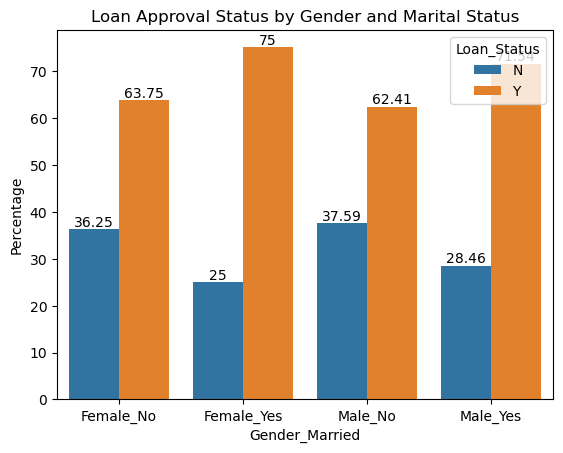

In [66]:
#Analyse the loan approval status based on gender and marital status
Loan_Status_counts=df.groupby(['Gender','Married','Loan_Status'])['Gender'].count()
total_counts=df.groupby(['Gender','Married'])['Loan_Status'].count()
loan_percentages=(Loan_Status_counts/total_counts*100).round(2)
loan_df=pd.concat([Loan_Status_counts,loan_percentages], axis=1, keys=['Count','Percentage']).reset_index()
loan_df['Gender_Married']=loan_df['Gender'] + "_" + loan_df['Married']
ax=sns.barplot(x='Gender_Married',y='Percentage',hue='Loan_Status',data=loan_df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Loan Approval Status by Gender and Marital Status")
plt.show()

We can observe that married females have got the highest percentage of loan approvals. 75% of the females who were married have got the loan approved among the total number femal applicants who were married.

In [67]:
keep_df=df.copy()

In [84]:
df=keep_df.copy()

Checking for Outliers

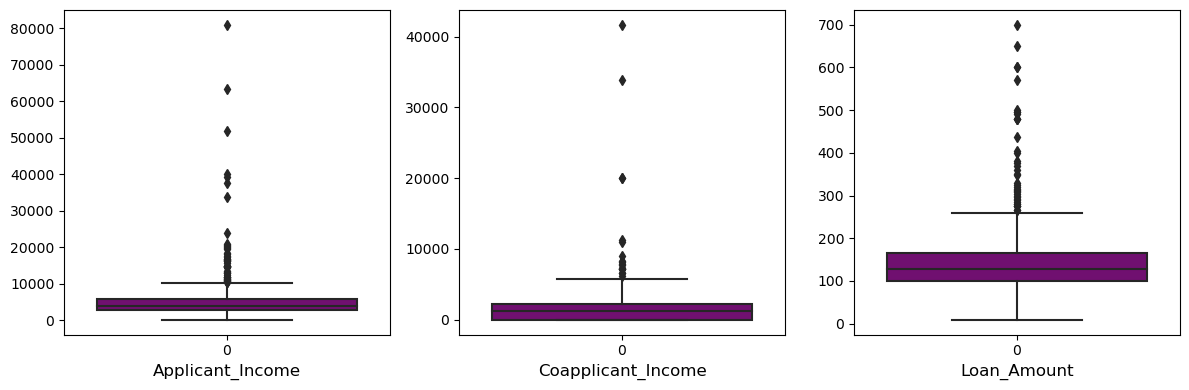

In [85]:
#Check for outliers in continuous data columns
plt.figure(figsize=(12,4),facecolor="white")
plotnumber=1
for col in continuous_col:
    ax=plt.subplot(1,3,plotnumber)
    sns.boxplot(df[col],color="purple")
    plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

There are outliers in all the three continuous columns. We will remove the outliers using Z-Score technique.

In [86]:
#Remove outliers
from scipy.stats import zscore
out_features=df[continuous_col]
z=np.abs(zscore(out_features))
df1=df[(z<3).all(axis=1)]

In [87]:
df1.shape

(589, 12)

In [88]:
print("Data loss percentage - ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage -  4.071661237785016


The data loss percentage is 4.07% which is less than 10% and hence acceptable. So, we will copy the changed dataset df1 into the original dataset df.

In [89]:
df=df1.copy()

Encoding Categorical Columns

In [93]:
#Separate columns with object data type
obj_col=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
obj_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [94]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for col in obj_col:
    df[col]=OE.fit_transform(df[col].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


Checking for Skewness

In [95]:
df.skew()

Gender               -1.626104
Married              -0.631755
Dependents            1.038787
Education             1.303332
Self_Employed         2.218831
Applicant_Income      2.164762
Coapplicant_Income    1.353191
Loan_Amount           1.114173
Loan_Amount_Term     -2.446026
Credit_History       -2.010069
Property_Area        -0.063183
Loan_Status          -0.828815
dtype: float64

All the continuous columns "Applicant_Income", "Coapplicant_Income" and "Loan_Amount" have skewness. We will apply different transformation methods to remove or reduce skewness from these columns.

In [96]:
#Copy df into a new dataset for checking different transformation methods
skew_df=df.copy()

Apply Yeo-Johnson transformation method to remove skewness

In [97]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
skew_df[continuous_col]=pt.fit_transform(skew_df[continuous_col])

In [98]:
skew_df.skew()

Gender               -1.626104
Married              -0.631755
Dependents            1.038787
Education             1.303332
Self_Employed         2.218831
Applicant_Income      0.028063
Coapplicant_Income   -0.186195
Loan_Amount           0.061412
Loan_Amount_Term     -2.446026
Credit_History       -2.010069
Property_Area        -0.063183
Loan_Status          -0.828815
dtype: float64

So, we have removed skewness from all the columns.

In [99]:
#Copy the changed dataset skew_df into the original dataset df
df=skew_df.copy()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              589 non-null    float64
 1   Married             589 non-null    float64
 2   Dependents          589 non-null    float64
 3   Education           589 non-null    float64
 4   Self_Employed       589 non-null    float64
 5   Applicant_Income    589 non-null    float64
 6   Coapplicant_Income  589 non-null    float64
 7   Loan_Amount         589 non-null    float64
 8   Loan_Amount_Term    589 non-null    float64
 9   Credit_History      589 non-null    float64
 10  Property_Area       589 non-null    float64
 11  Loan_Status         589 non-null    float64
dtypes: float64(12)
memory usage: 59.8 KB


In [101]:
#Statistical summary of numerical columns
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02,5.890000e+02,5.890000e+02,589.000000,589.000000,589.000000,589.000000
mean,0.814941,0.650255,0.724958,0.227504,0.129032,1.839690e-16,-1.357149e-16,-2.616281e-16,342.478778,0.853990,1.035654,0.691002
std,0.388676,0.477295,0.996118,0.419577,0.335521,1.000850e+00,1.000850e+00,1.000850e+00,64.398591,0.353417,0.789225,0.462473
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.437735e+00,-1.119438e+00,-3.891486e+00,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-6.029239e-01,-1.119438e+00,-5.565132e-01,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-1.249054e-01,6.815548e-01,3.681941e-03,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5.761212e-01,8.838395e-01,5.588701e-01,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,3.115070e+00,1.381352e+00,3.231883e+00,480.000000,1.000000,2.000000,1.000000


Observations:

Now, we can see that there is not much skewness in the continuous features as the mean is almost equal to the median (50%) in these columns.

Also, outliers from all the continuous features have been removed due to which max is not mucn bigger than 75% in the continuous features.

In [102]:
#Check the correlation between features and label
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.000841,0.058502,0.230767,0.157432,-0.084919,0.013432,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.004453,-0.022535,0.334429,0.173073,-0.100776,0.019377,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.055481,0.105559,0.001199,0.128368,-0.091158,-0.017650,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.003507,-0.168924,0.037050,-0.133962,-0.076546,-0.073799,-0.065623,-0.092852
Self_Employed,0.000841,-0.004453,0.055481,-0.003507,1.000000,0.215911,-0.100679,0.105322,-0.053868,-0.012954,-0.030248,-0.016617
Applicant_Income,0.058502,-0.022535,0.105559,-0.168924,0.215911,1.000000,-0.359986,0.436309,-0.041597,0.026989,-0.016277,-0.003320
Coapplicant_Income,0.230767,0.334429,0.001199,0.037050,-0.100679,-0.359986,1.000000,0.199690,0.013888,0.005130,-0.068086,0.080277
Loan_Amount,0.157432,0.173073,0.128368,-0.133962,0.105322,0.436309,0.199690,1.000000,0.094441,-0.008701,-0.102290,-0.034886
Loan_Amount_Term,-0.084919,-0.100776,-0.091158,-0.076546,-0.053868,-0.041597,0.013888,0.094441,1.000000,-0.013960,-0.070405,-0.023119
Credit_History,0.013432,0.019377,-0.017650,-0.073799,-0.012954,0.026989,0.005130,-0.008701,-0.013960,1.000000,-0.005694,0.555908


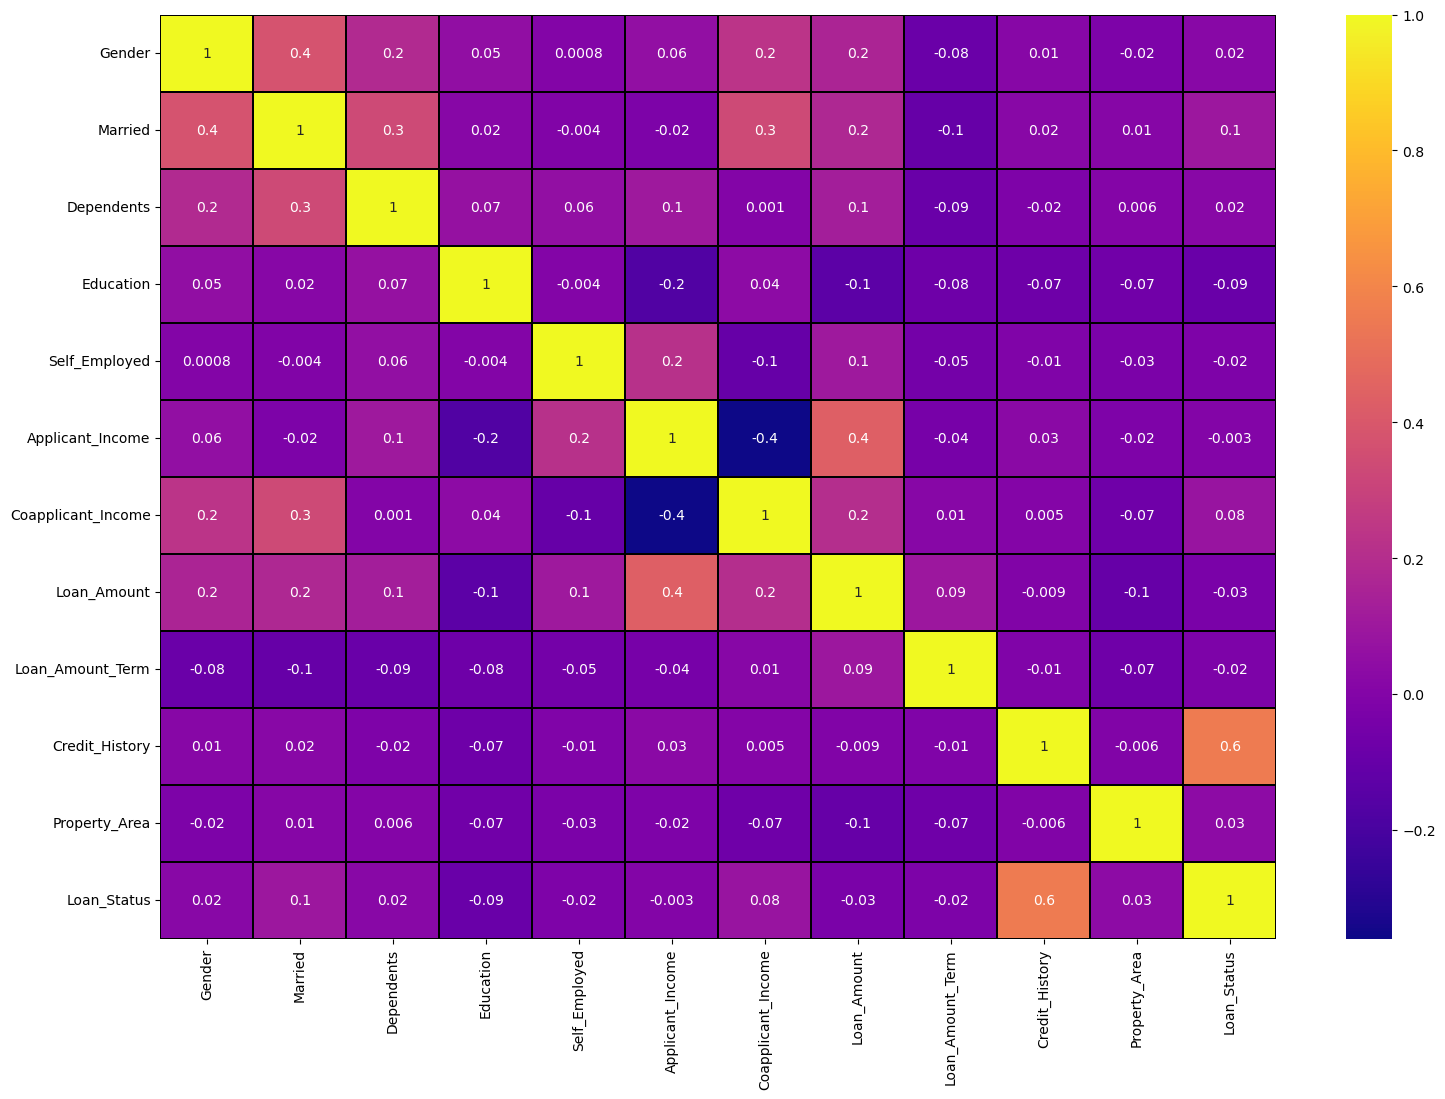

In [103]:
#Visualize the correlation between features and label
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='plasma')
plt.show()

Observations:

The label "Loan_Staus" has high positive correlation with the feature "Credit_History".